In [3]:
import pandas as pd

# Load CSV, skip the first row (headers in your file)
df = pd.read_csv('/content/groceries - groceries.csv', header=1)

# Drop the first column which is 'Item(s)' (counts) if not needed
df = df.drop(columns=df.columns[0])
# Explore
print(df.head())


       citrus fruit semi-finished bread       margarine  \
0    tropical fruit              yogurt          coffee   
1        whole milk                 NaN             NaN   
2         pip fruit              yogurt    cream cheese   
3  other vegetables          whole milk  condensed milk   
4        whole milk              butter          yogurt   

                ready soups        Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                       NaN               NaN        NaN        NaN   
1                       NaN               NaN        NaN        NaN   
2              meat spreads               NaN        NaN        NaN   
3  long life bakery product               NaN        NaN        NaN   
4                      rice  abrasive cleaner        NaN        NaN   

  Unnamed: 8 Unnamed: 9 Unnamed: 10  ... Unnamed: 23 Unnamed: 24 Unnamed: 25  \
0        NaN        NaN         NaN  ...         NaN         NaN         NaN   
1        NaN        NaN         NaN  ...         NaN      

In [4]:
# Convert dataframe to list of transactions
transactions = []
for i in range(len(df)):
    # Drop NaN and convert to list
    transaction = df.iloc[i].dropna().tolist()
    transactions.append(transaction)

# Check first 5 transactions
print(transactions[:5])

[['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']]


**One-Hot Encode Transactions**

Apriori and FP-Growth require a dataframe where each column is an item, and each row shows whether that item is in the transaction (True/False).

In [5]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Initialize Transaction Encoder
te = TransactionEncoder()

# Fit and transform the transactions
te_ary = te.fit(transactions).transform(transactions)

# Convert to DataFrame
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Check first 5 rows
print(df_trans.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False              True             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  

Find Frequent Itemsets
**Using Apriori**

In [6]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets with minimum support of 1% (0.01)
frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)

# Sort by support
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

# Show top 10 frequent itemsets
print(frequent_itemsets.head(10))


     support            itemsets
86  0.255542        (whole milk)
55  0.193512  (other vegetables)
66  0.183954        (rolls/buns)
75  0.174395              (soda)
87  0.139516            (yogurt)
6   0.110535     (bottled water)
67  0.109010   (root vegetables)
81  0.104942    (tropical fruit)
73  0.098536     (shopping bags)
70  0.093960           (sausage)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Find Frequent Itemsets **Using FP-Growth**

In [7]:
from mlxtend.frequent_patterns import fpgrowth

# Find frequent itemsets with FP-Growth
frequent_itemsets_fp = fpgrowth(df_trans, min_support=0.01, use_colnames=True)

# Sort by support
frequent_itemsets_fp = frequent_itemsets_fp.sort_values('support', ascending=False)

# Show top 10 frequent itemsets
print(frequent_itemsets_fp.head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

     support            itemsets
3   0.255542        (whole milk)
6   0.193512  (other vegetables)
10  0.183954        (rolls/buns)
22  0.174395              (soda)
0   0.139516            (yogurt)
14  0.110535     (bottled water)
34  0.109010   (root vegetables)
1   0.104942    (tropical fruit)
41  0.098536     (shopping bags)
40  0.093960           (sausage)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Generate Association Rules

In [8]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from Apriori itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Sort by lift (strength of association)
rules = rules.sort_values('lift', ascending=False)

# Show top 10 rules
print(rules.head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

                            antecedents                         consequents  \
521                              (curd)                (whole milk, yogurt)   
520                (whole milk, yogurt)                              (curd)   
471                   (root vegetables)    (other vegetables, citrus fruit)   
470    (other vegetables, citrus fruit)                   (root vegetables)   
498          (yogurt, other vegetables)                (whipped/sour cream)   
499                (whipped/sour cream)          (yogurt, other vegetables)   
325  (tropical fruit, other vegetables)                   (root vegetables)   
328                   (root vegetables)  (tropical fruit, other vegetables)   
158                   (root vegetables)                              (beef)   
159                              (beef)                   (root vegetables)   

     antecedent support  consequent support   support  confidence      lift  \
521            0.053285            0.056030  0.0100

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Bar Chart of Top Frequent Items

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

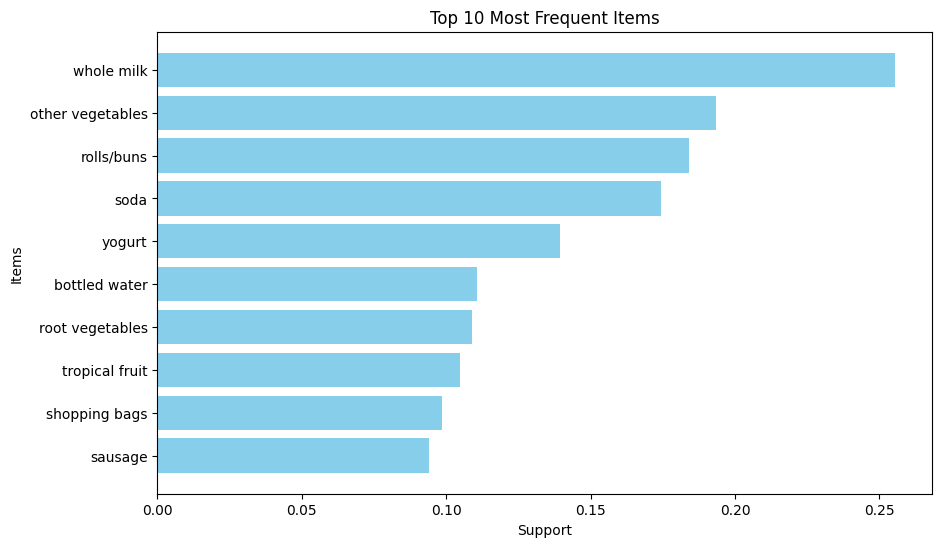

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [9]:
import matplotlib.pyplot as plt

# Filter only single items (1-itemsets)
frequent_items = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]

# Sort by support
frequent_items = frequent_items.sort_values('support', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh([list(x)[0] for x in frequent_items['itemsets']], frequent_items['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Top 10 Most Frequent Items')
plt.gca().invert_yaxis()  # largest on top
plt.show()


Visualize Association Rules with a Network Graph

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

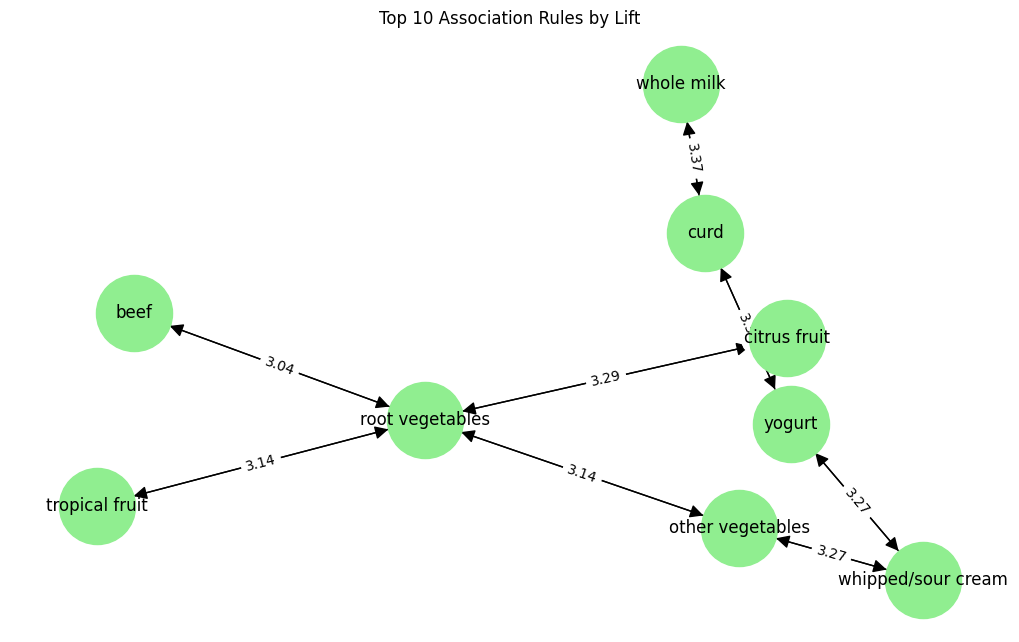

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
import networkx as nx

# Use only top 10 rules by lift for clarity
top_rules = rules.head(10)

# Create directed graph
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Draw graph
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=12, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v,2) for k,v in edge_labels.items()})
plt.title('Top 10 Association Rules by Lift')
plt.show()


Scatter plot of Support vs Confidence

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

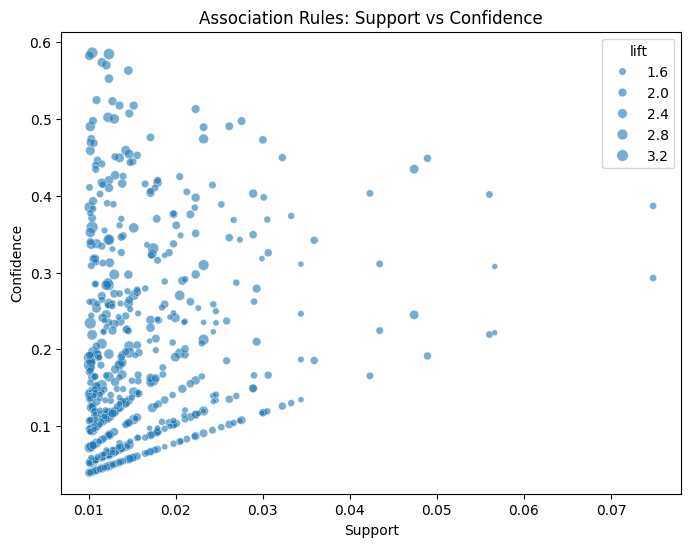

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [11]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()
